In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Library & Load Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Praktik_KA/Cancer_Data.csv")
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Menghapus kolom id dan Unnamed: 32 dari DataFrame data
data.drop(["id","Unnamed: 32"], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#Graph

Menganalisis distribusi kanker jinak (B) dan kanker ganas (M) dalam data pada grafik dengan dua fitur unik

“M” = Kanker Ganas

“B” = Kanker Jinak

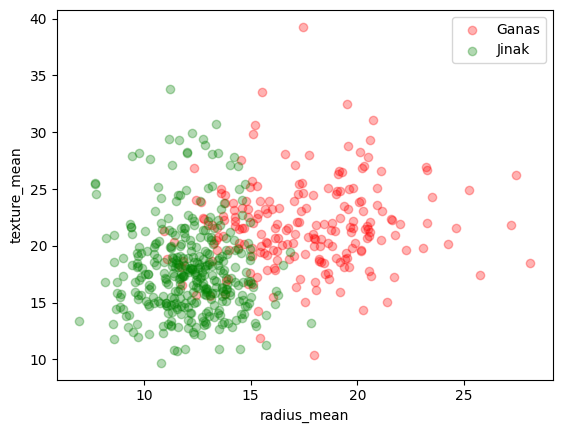

In [ ]:
#Menampilkan dalam bentuk graph
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

plt.scatter(M.radius_mean,M.texture_mean, color = "red", label = "Ganas", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean, color = "green", label = "Jinak", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

#Normalization

In [ ]:
#Ubah diagnosisi M=1 B-0
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis
x_data = data.drop(["diagnosis"],axis = 1)
print("X Data \n",x_data)
print("Y Data \n",y)

X Data 
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_

In [ ]:
#Membagi nilai yang telah digeser dengan rentang nilai
#Hasil akhirnya adalah nilai-nilai yang berada dalam rentang 0 hingga 1
import numpy as np
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

#Train Data & KNN Model

In [ ]:
#split train data 80%, test data 20%

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

Jumlah data latih: 455
Jumlah data uji: 114


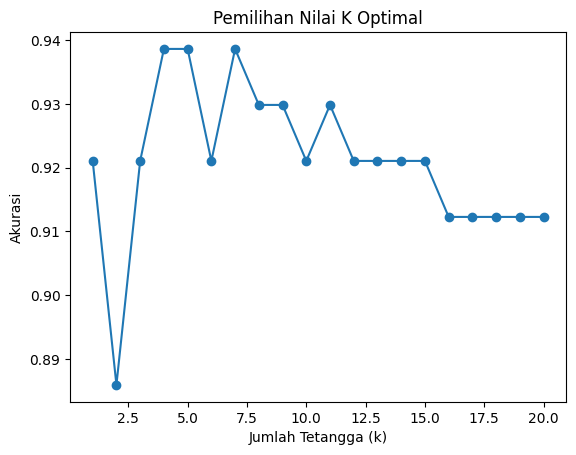

K optimal: 4


In [ ]:
# Mencari k terbaik
accuracies = []
for k in range(1, 21):  # Uji nilai k dari 1 hingga 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    acc = accuracy_score(y_test, knn.predict(x_test))
    accuracies.append(acc)

# Visualisasi akurasi berdasarkan nilai k
plt.plot(range(1, 21), accuracies, marker='o')
plt.title("Pemilihan Nilai K Optimal")
plt.xlabel("Jumlah Tetangga (k)")
plt.ylabel("Akurasi")
plt.show()

# K terbaik
optimal_k = accuracies.index(max(accuracies)) + 1
print("K optimal:", optimal_k)


In [ ]:
# Membuat model KNN
k = 4  # Jumlah tetangga
knn = KNeighborsClassifier(n_neighbors=k)

# Melatih model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Prediksi pada data uji
y_pred = knn.predict(x_test)

# Menampilkan hasil prediksi
print("Hasil Prediksi:", y_pred)

Hasil Prediksi: [0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0]


#Akurasi & Visualisasi

In [ ]:
# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9385964912280702


In [ ]:
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred,))

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluasi model menggunakan cross-validation
cv_scores = cross_val_score(knn, x, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Rata-rata Akurasi:", cv_scores.mean())

Cross-Validation Scores: [0.87719298 0.92105263 0.93859649 0.94736842 0.92920354]
Rata-rata Akurasi: 0.9226828132277596


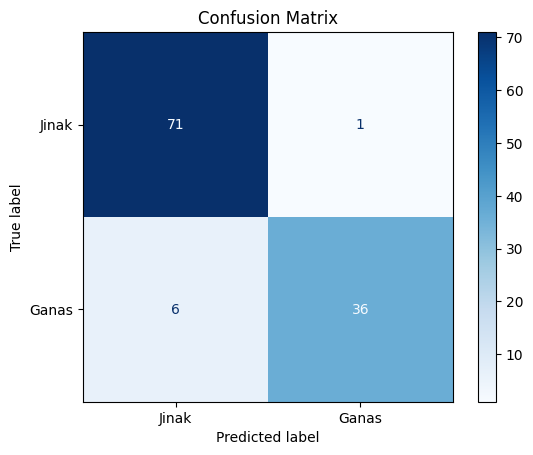

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Jinak", "Ganas"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
